<a href="https://colab.research.google.com/github/finerbrighterlighter/myanmar_covid19/blob/master/myanmar_compared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import seaborn as sns
from google.colab import files
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

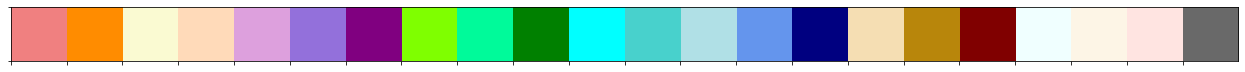

In [18]:
color_plan = ["lightcoral",
          "darkorange","lightgoldenrodyellow","peachpuff",
          "plum","mediumpurple","purple",
          "chartreuse","mediumspringgreen","green",
          "aqua","mediumturquoise",
          "powderblue","cornflowerblue","navy",
          "wheat","darkgoldenrod","maroon",
          "azure","oldlace","mistyrose","dimgray"]
sns.palplot(sns.color_palette(color_plan))

In [0]:
data = "https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv"

In [20]:
df_ori = pd.read_csv (data, header=0)
df_ori

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,7.0,7.0,11.0,16.0,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0,94.0,110.0,110.0,120.0,170.0,174.0,237.0,273.0,281.0,299.0,349.0,367.0,423.0,444.0,484.0,521.0,555.0,607.0,665.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,33.0,38.0,42.0,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0,174.0,186.0,197.0,212.0,223.0,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0,400.0,409.0,416.0,433.0,446.0,467.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,24.0,26.0,37.0,48.0,54.0,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0,367.0,409.0,454.0,511.0,584.0,716.0,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0,1666.0,1761.0,1825.0,1914.0,1983.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0,224.0,267.0,308.0,334.0,370.0,376.0,390.0,428.0,439.0,466.0,501.0,525.0,545.0,564.0,583.0,601.0,601.0,638.0,646.0,AND,150,Europe,39,Southern Europe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Saint Pierre and Miquelon,France,46.8852,-56.3159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,SPM,19,Americas,21,Northern America,NaN,NaN
261,NaN,South Sudan,6.8770000000000024,31.307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,SSD,2,Africa,202,Sub-Saharan Africa,14,Eastern Africa
262,NaN,Western Sahara,24.2155,-12.8858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [21]:
# countries of interest = China and Top Five countries with highest mortality 
# According to worldometer on 14/4/2020, it is US, Italy, Spain, France, and UK
countries = ["China","US", "Italy", "Spain", "France", "United Kingdom"]
# I will not be using Burma data here, since it is actually slightly incorrect.
df_countries = pd.DataFrame(countries, columns=["country"])

# merge
df_ori=df_countries.merge(df_ori.groupby(["Country/Region"]).sum(),left_on="country",right_on="Country/Region",indicator=False,how='left')
df_ori= df_ori.set_index(["country"])
df_ori


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,9802.0,11891.0,16630.0,19716.0,23707.0,27440.0,30587.0,34110.0,36814.0,39829.0,42354.0,44386.0,44759.0,59895.0,66358.0,68413.0,70513.0,72434.0,74211.0,74619.0,75077.0,75550.0,77001.0,77022.0,77241.0,77754.0,78166.0,78600.0,78928.0,79356.0,79932.0,...,80537.0,80690.0,80770.0,80823.0,80860.0,80887.0,80921.0,80932.0,80945.0,80977.0,81003.0,81033.0,81058.0,81102.0,81156.0,81250.0,81305.0,81435.0,81498.0,81591.0,81661.0,81782.0,81897.0,81999.0,82122.0,82198.0,82279.0,82361.0,82432.0,82511.0,82543.0,82602.0,82665.0,82718.0,82809.0,82883.0,82941.0,83014.0,83134.0,83213.0
US,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,7.0,8.0,8.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,15.0,15.0,15.0,51.0,51.0,57.0,58.0,60.0,68.0,74.0,...,217.0,262.0,402.0,518.0,583.0,959.0,1281.0,1663.0,2179.0,2727.0,3499.0,4632.0,6421.0,7783.0,13747.0,19273.0,25600.0,33276.0,43847.0,53740.0,65778.0,83836.0,101657.0,121465.0,140909.0,161831.0,188172.0,213372.0,243762.0,275586.0,308853.0,337072.0,366667.0,396223.0,429052.0,461437.0,496535.0,526396.0,555313.0,580619.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,20.0,62.0,155.0,229.0,322.0,453.0,655.0,888.0,1128.0,1694.0,...,3858.0,4636.0,5883.0,7375.0,9172.0,10149.0,12462.0,12462.0,17660.0,21157.0,24747.0,27980.0,31506.0,35713.0,41035.0,47021.0,53578.0,59138.0,63927.0,69176.0,74386.0,80589.0,86498.0,92472.0,97689.0,101739.0,105792.0,110574.0,115242.0,119827.0,124632.0,128948.0,132547.0,135586.0,139422.0,143626.0,147577.0,152271.0,156363.0,159516.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,13.0,15.0,32.0,45.0,84.0,...,259.0,400.0,500.0,673.0,1073.0,1695.0,2277.0,2277.0,5232.0,6391.0,7798.0,9942.0,11748.0,13910.0,17963.0,20410.0,25374.0,28768.0,35136.0,39885.0,49515.0,57786.0,65719.0,73235.0,80110.0,87956.0,95923.0,104118.0,112065.0,119199.0,126168.0,131646.0,136675.0,141942.0,148220.0,153222.0,158273.0,163027.0,166831.0,170099.0
France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,14.0,18.0,38.0,57.0,100.0,130.0,...,380.0,656.0,959.0,1136.0,1219.0,1794.0,2293.0,2293.0,3681.0,4496.0,4532.0,6683.0,7715.0,9124.0,10970.0,12758.0,14463.0,16243.0,20123.0,22622.0,25600.0,29551.0,33402.0,38105.0,40708.0,45170.0,52827.0,57749.0,59929.0,65202.0,90848.0,93773.0,98963.0,110065.0,113959.0,118781.0,125931.0,130727.0,133670.0,137875.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,13.0,13.0,13.0,15.0,20.0,23.0,36.0,...,116.0,164.0,207.0,274.0,322.0,384.0,459.0,459.0,802.0,1144.0,1145.0,1551.0,1960.0,2642.0,2716.0,4014.0,5067.0,5745.0,6726.0,8164.0,9640.0,11812.0,14745.0,17312.0,19780.0,22453.0,25481.0,29865.0,34173.0,38689.0,42477.0,48436.0,52279.0,55949.0,61474.0,65872.0,74605.0,79874.0,85206.0,89570.0


In [22]:
df=df_ori.T.reset_index()
df.rename(columns={"index": "date"}, inplace=True)
df["date"]=pd.to_datetime(df["date"].values)
df

country,date,China,US,Italy,Spain,France,United Kingdom
0,2020-01-22,548.0,1.0,0.0,0.0,0.0,0.0
1,2020-01-23,643.0,1.0,0.0,0.0,0.0,0.0
2,2020-01-24,920.0,2.0,0.0,0.0,2.0,0.0
3,2020-01-25,1406.0,2.0,0.0,0.0,3.0,0.0
4,2020-01-26,2075.0,5.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...
78,2020-04-09,82883.0,461437.0,143626.0,153222.0,118781.0,65872.0
79,2020-04-10,82941.0,496535.0,147577.0,158273.0,125931.0,74605.0
80,2020-04-11,83014.0,526396.0,152271.0,163027.0,130727.0,79874.0
81,2020-04-12,83134.0,555313.0,156363.0,166831.0,133670.0,85206.0


In [23]:
# adding myanmar data
myanmar = "https://raw.githubusercontent.com/finerbrighterlighter/myanmar_covid19/master/mohs_announcement.csv"
df_myanmar = pd.read_csv(myanmar,header= 0)
df_myanmar["ann_date"] = pd.to_datetime(df_myanmar["ann_date"].values, dayfirst=True)
df_myanmar = df_myanmar.groupby(["ann_date"]).size().to_frame("myanmar").reset_index(drop=True)
df_myanmar["myanmar"]=df_myanmar["myanmar"].cumsum()
df_myanmar.insert(loc=0, column="day", value=np.arange(1,len(df_myanmar)+1))
df_myanmar

,day,myanmar
0,1,2
1,2,3
2,3,5
3,4,8
4,5,10
5,6,15
6,7,16
7,8,20
8,9,21
9,10,22


In [24]:
# list(range(1, 21)) -> I use 21 because Myanmar is still on 16 days so, comparing only to 20
# change this to the day you want + 1
# for future

days = list(range(1, 21))
days = pd.DataFrame(days, columns=["day"])
days

,day
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [25]:
# China - day 1 (22/1/2020)

days_ch = days.merge(df["China"], how="left", indicator=False, left_index=True, right_index=True)
days_ch

,day,China
0,1,548.0
1,2,643.0
2,3,920.0
3,4,1406.0
4,5,2075.0
5,6,2877.0
6,7,5509.0
7,8,6087.0
8,9,8141.0
9,10,9802.0


In [26]:
# US - day 1 (22/1/2020)

days_us = days.merge(df["US"], how="left", indicator=False, left_index=True, right_index=True)
days_us

,day,US
0,1,1.0
1,2,1.0
2,3,2.0
3,4,2.0
4,5,5.0
5,6,5.0
6,7,5.0
7,8,5.0
8,9,5.0
9,10,7.0


In [27]:
# france - day 1 (24/1/2020)

df_fr = df.loc[2:, "France"].reset_index(drop=True).to_frame("france")
days_fr = days.merge(df_fr, how="left", indicator=False, left_index=True, right_index=True)
days_fr

,day,france
0,1,2.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,4.0
5,6,5.0
6,7,5.0
7,8,5.0
8,9,6.0
9,10,6.0


In [28]:
# italy - day 1 (31/1/2020)

df_ita = df.loc[10:, "Italy"].reset_index(drop=True).to_frame("italy")
days_ita = days.merge(df_ita, how="left", indicator=False, left_index=True, right_index=True)
days_ita

,day,italy
0,1,2.0
1,2,2.0
2,3,2.0
3,4,2.0
4,5,2.0
5,6,2.0
6,7,3.0
7,8,3.0
8,9,3.0
9,10,3.0


In [29]:
# spain - day 1 (1/2/2020)

df_es = df.loc[11:, "Spain"].reset_index(drop=True).to_frame("spain")
days_es = days.merge(df_es, how="left", indicator=False, left_index=True, right_index=True)
days_es

,day,spain
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,2.0
8,9,2.0
9,10,2.0


In [30]:
# UK - day 1 (31/1/2020)

df_uk = df.loc[10:, "United Kingdom"].reset_index(drop=True).to_frame("uk")
days_uk = days.merge(df_uk, how="left", indicator=False, left_index=True, right_index=True)
days_uk

,day,uk
0,1,2.0
1,2,2.0
2,3,2.0
3,4,2.0
4,5,2.0
5,6,2.0
6,7,3.0
7,8,3.0
8,9,3.0
9,10,8.0


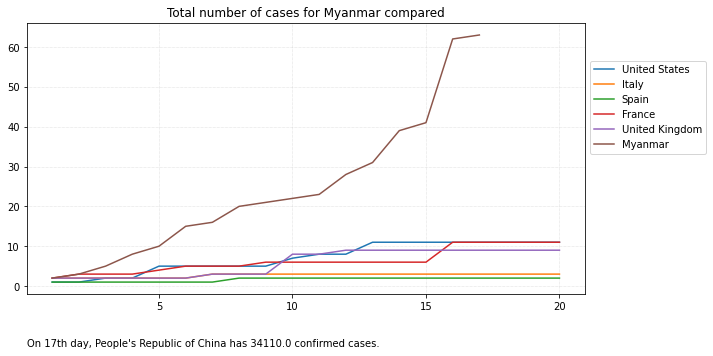

In [46]:
# plot

fig, ax = plt.subplots(figsize=(10,5))
ax.grid(linestyle=':', linewidth='0.5', color='silver')
ax.set_axisbelow(True)
sns.color_palette(color_plan)

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))

#china = plt.plot(days, days_ch["China"], color="cornflowerblue")
us = plt.plot(days, days_us["US"])
italy = plt.plot(days, days_ita["italy"])
spain = plt.plot(days, days_es["spain"])
france = plt.plot(days, days_fr["france"])
uk = plt.plot(days, days_uk["uk"])
myanmar = plt.plot(df_myanmar["day"], df_myanmar["myanmar"])


plt.title("Total number of cases for Myanmar compared")
plt.legend((us[0],italy[0],spain[0],france[0],uk[0],myanmar[0]), ("United States", "Italy", "Spain", "France", "United Kingdom", "Myanmar"),loc="lower left", bbox_to_anchor=(1, 0.5))
plt.text(0, -0.2,"On "+str(len(df_myanmar))+"th day, People's Republic of China has "+ str(days_ch.loc[len(df_myanmar)-1,"China"])+" confirmed cases.", horizontalalignment="left", verticalalignment="bottom", transform=ax.transAxes)



cases = str(len(df_myanmar))+" days comparison.svg"
plt.savefig(cases, bbox_inches = "tight")
plt.show()
files.download(cases)

In [0]:
reset